In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Comment the following lines if imadedb and imagedb_test are already in content folder or specify path for data in drive
import zipfile
local_zip = '/content/drive/MyDrive/Colab_Notebooks/CV_2020-2021_DL/HW4/imagedb_btsd.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
train_dir = "/content/imagedb" 
test_dir = "/content/imagedb_test" 

In [4]:
from keras.backend import tanh,softplus
def mish(x):
    return x * tanh(softplus(x))
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'mish': mish})

In [5]:
from tensorflow import keras

model = keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks/CV_2020-2021_DL/HW4/best_weights_mish_aug_v3.hdf5")
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 128, 128, 16)      2368      
_________________________________________________________________
batch_normalization_105 (Bat (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 64, 64, 32)        12832     
_________________________________________________________________
batch_normalization_106 (Bat (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 64, 64, 32)        25632     
_________________________________________________________________
batch_normalization_107 (Bat (None, 64, 64, 32)      

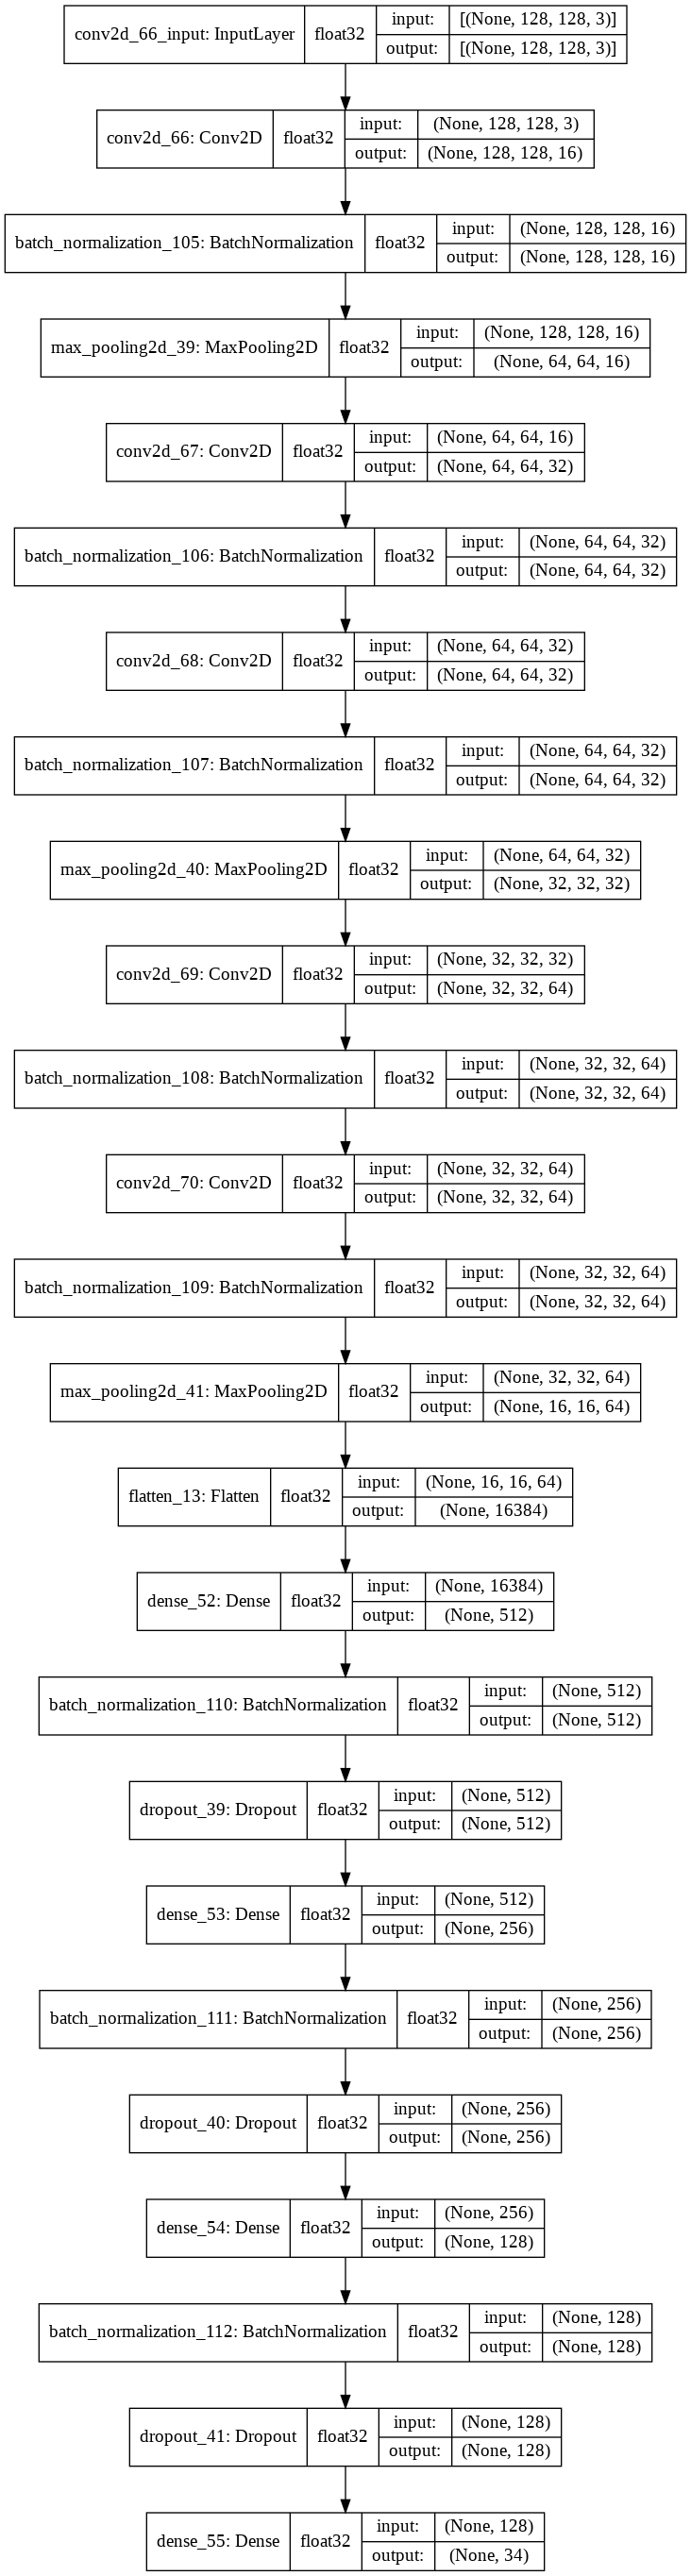

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,show_dtype=True)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen  = ImageDataGenerator(rescale=1./255)
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                        batch_size=64,
                                                        class_mode='categorical',
                                                        #  color_mode='grayscale',
                                                         target_size=(128,128)) 
loss, acc = model.evaluate(test_generator)

Found 2149 images belonging to 34 classes.
34/34 [==============================] - 3s 78ms/step - loss: 0.1191 - acc: 0.9716


https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb#scrollTo=FydxebyMFb6w

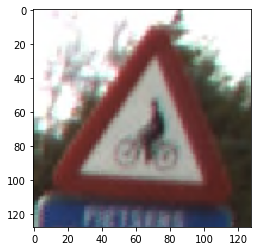

img tensor shape (1, 128, 128, 3)


In [8]:
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
#Selecting an image for the activation model 
img_path = '/content/imagedb_test/00008/00420_00002.ppm'
img1 = image.load_img(img_path, target_size=(128, 128))
img = image.img_to_array(img1)
img = np.expand_dims(img, axis=0)
img /= 255.
plt.imshow(img[0])
plt.show()
print("img tensor shape",img.shape)

In [9]:
from keras import models

# Extracts the outputs of the top 13 layers:
layer_outputs = [layer.output for layer in model.layers[:13]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [10]:
# This will return a list of Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img)

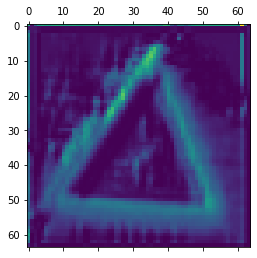

In [13]:
plt.matshow(activations[4][0, :, :,31], cmap='viridis')
plt.show()

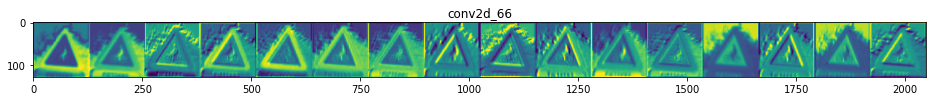

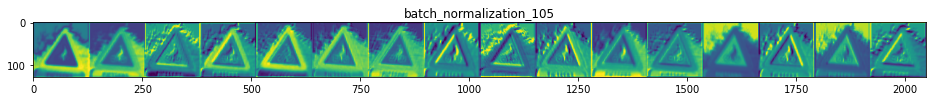

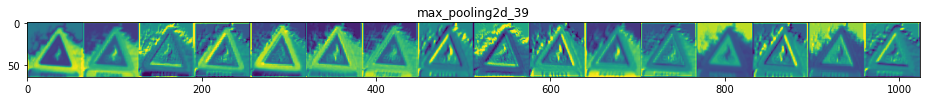

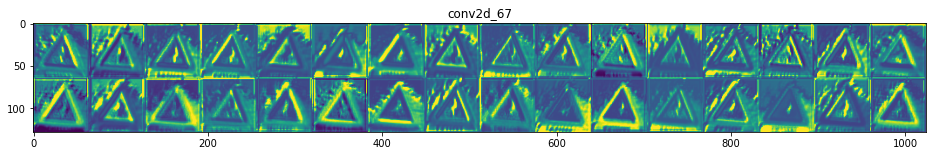

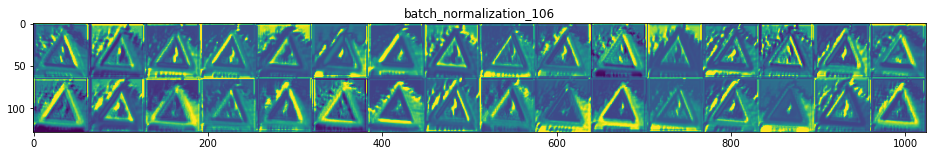

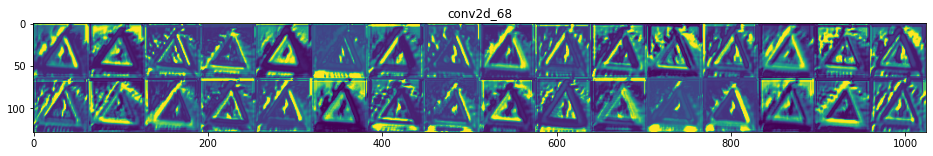

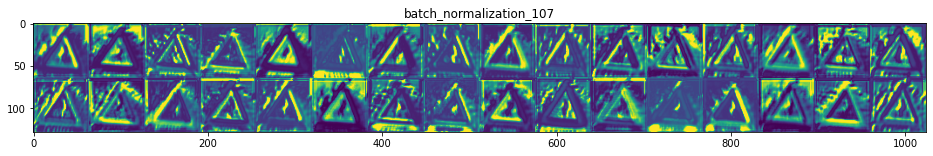

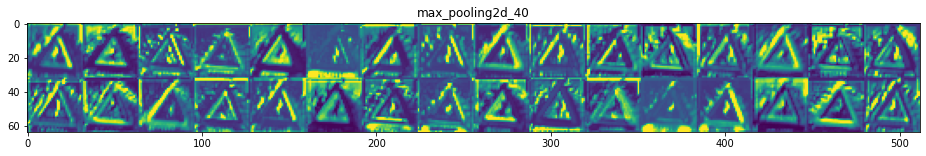

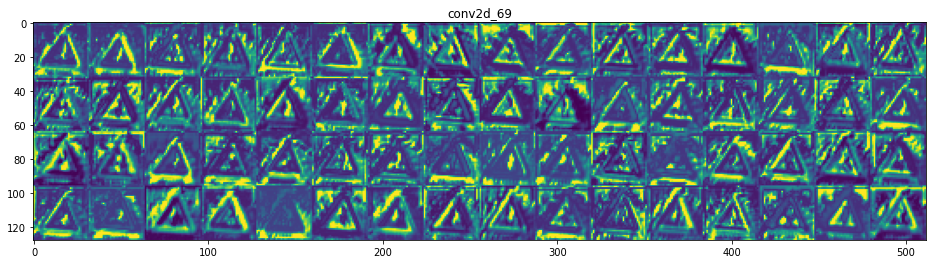

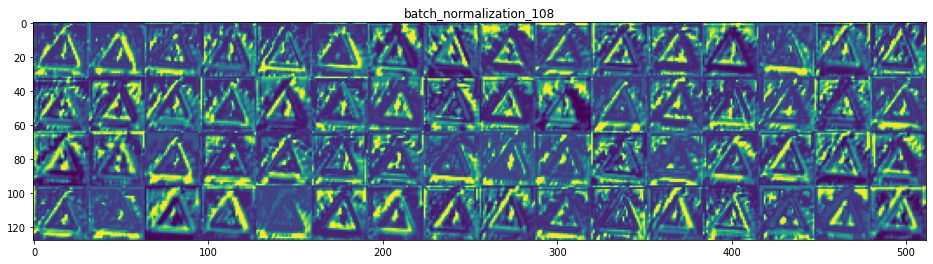

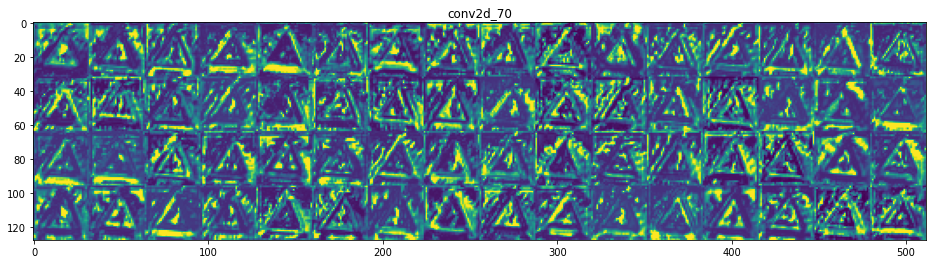

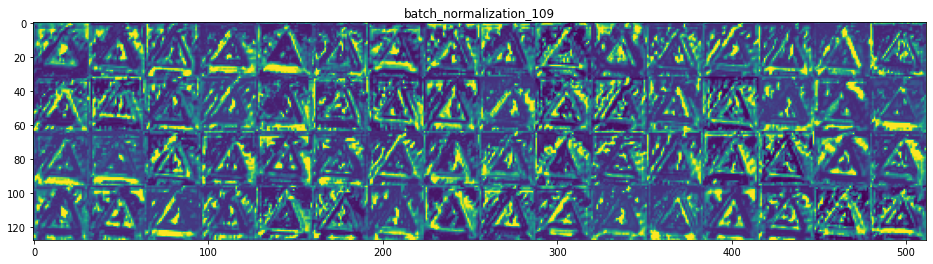

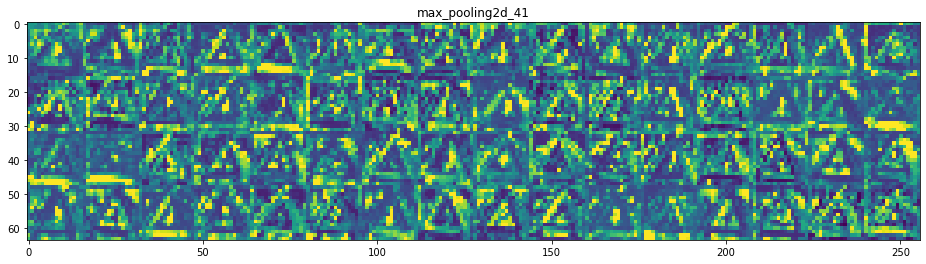

In [18]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()